<b> Problem Statement:</b> <br>

The stock market is one of the most highly sought fields these days. Predicting how the stock price is going to behave will always keep us one step ahead.

<b> Objective: </b>

Visualize the data with the help of the following list of plots, and generate a few insights from the data.

- Time Plot
- Stacked Line Charts
- Box Plot
- Lag Plot
- Auto-Correlation Plot

## <b>Dataset Description: </b>
- The Dataset is the average monthly stock price of a beer production company in Australia from 1991 to 2005.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.rc('xtick',labelsize=40)
matplotlib.rc('ytick',labelsize=40)
import seaborn as sns
sns.set(style='whitegrid',color_codes=True)
import datetime


In [2]:
ts =pd.read_csv('stock_price.csv')
ts.head()

,ds,y
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [3]:
ts.shape

(204, 2)

Text(0.5, 1.0, 'Stock Price')

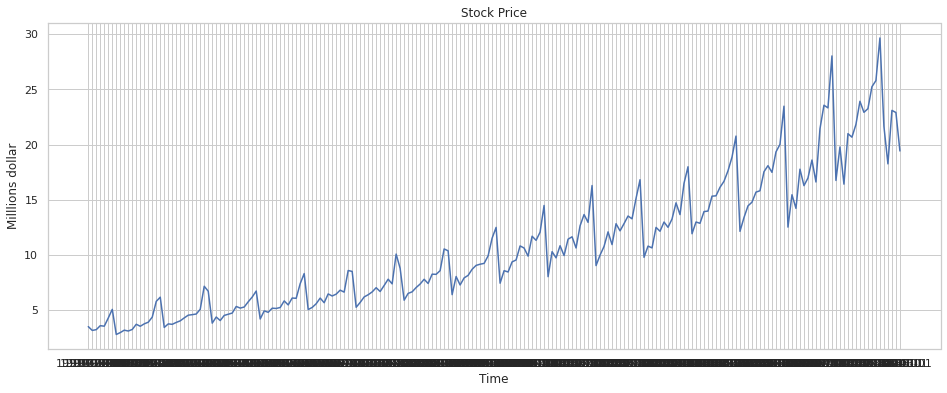

In [4]:
plt.figure(figsize=(16,6))
plt.plot(ts['ds'],ts['y'])
plt.xlabel("Time")
plt.ylabel("Milllions dollar")
plt.title("Stock Price")

$Interpretation:$ we can see that the trend is increasing.

In [5]:
ts['ds']= pd.to_datetime(ts['ds'])

In [6]:
ts['year']=ts["ds"].dt.year
ts['month'] =ts["ds"].dt.strftime('%b')
ts.head()

,ds,y,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov


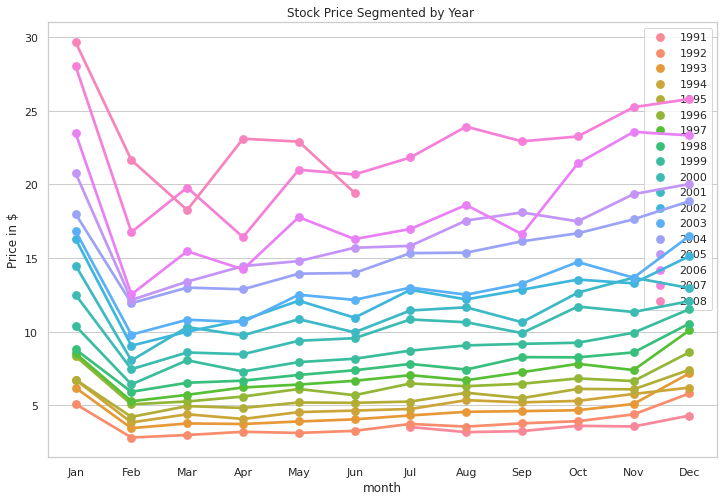

In [7]:
# let us plot the graph 
plt.figure(figsize=(12,8))
sns.pointplot(x="month", y="y", hue="year", data =ts,order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
       'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel("month")
plt.ylabel("Price in $")
plt.title("Stock Price Segmented by Year ")
plt.legend(loc='upper right')

Text(0.5, 1.0, 'Stock Price Segmented by Year ')

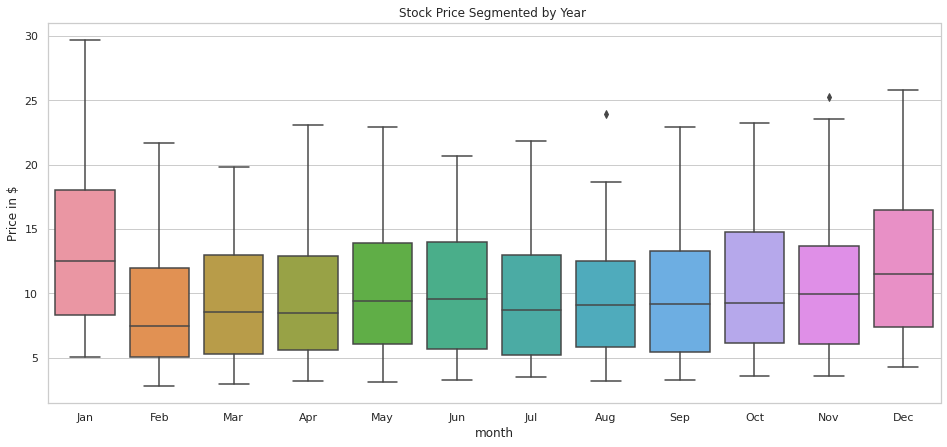

In [8]:
# boxplot
plt.figure(figsize=(16,7))
sns.boxplot(x='month',y='y',data=ts,order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel("month")
plt.ylabel("Price in $")
plt.title("Stock Price Segmented by Year ")

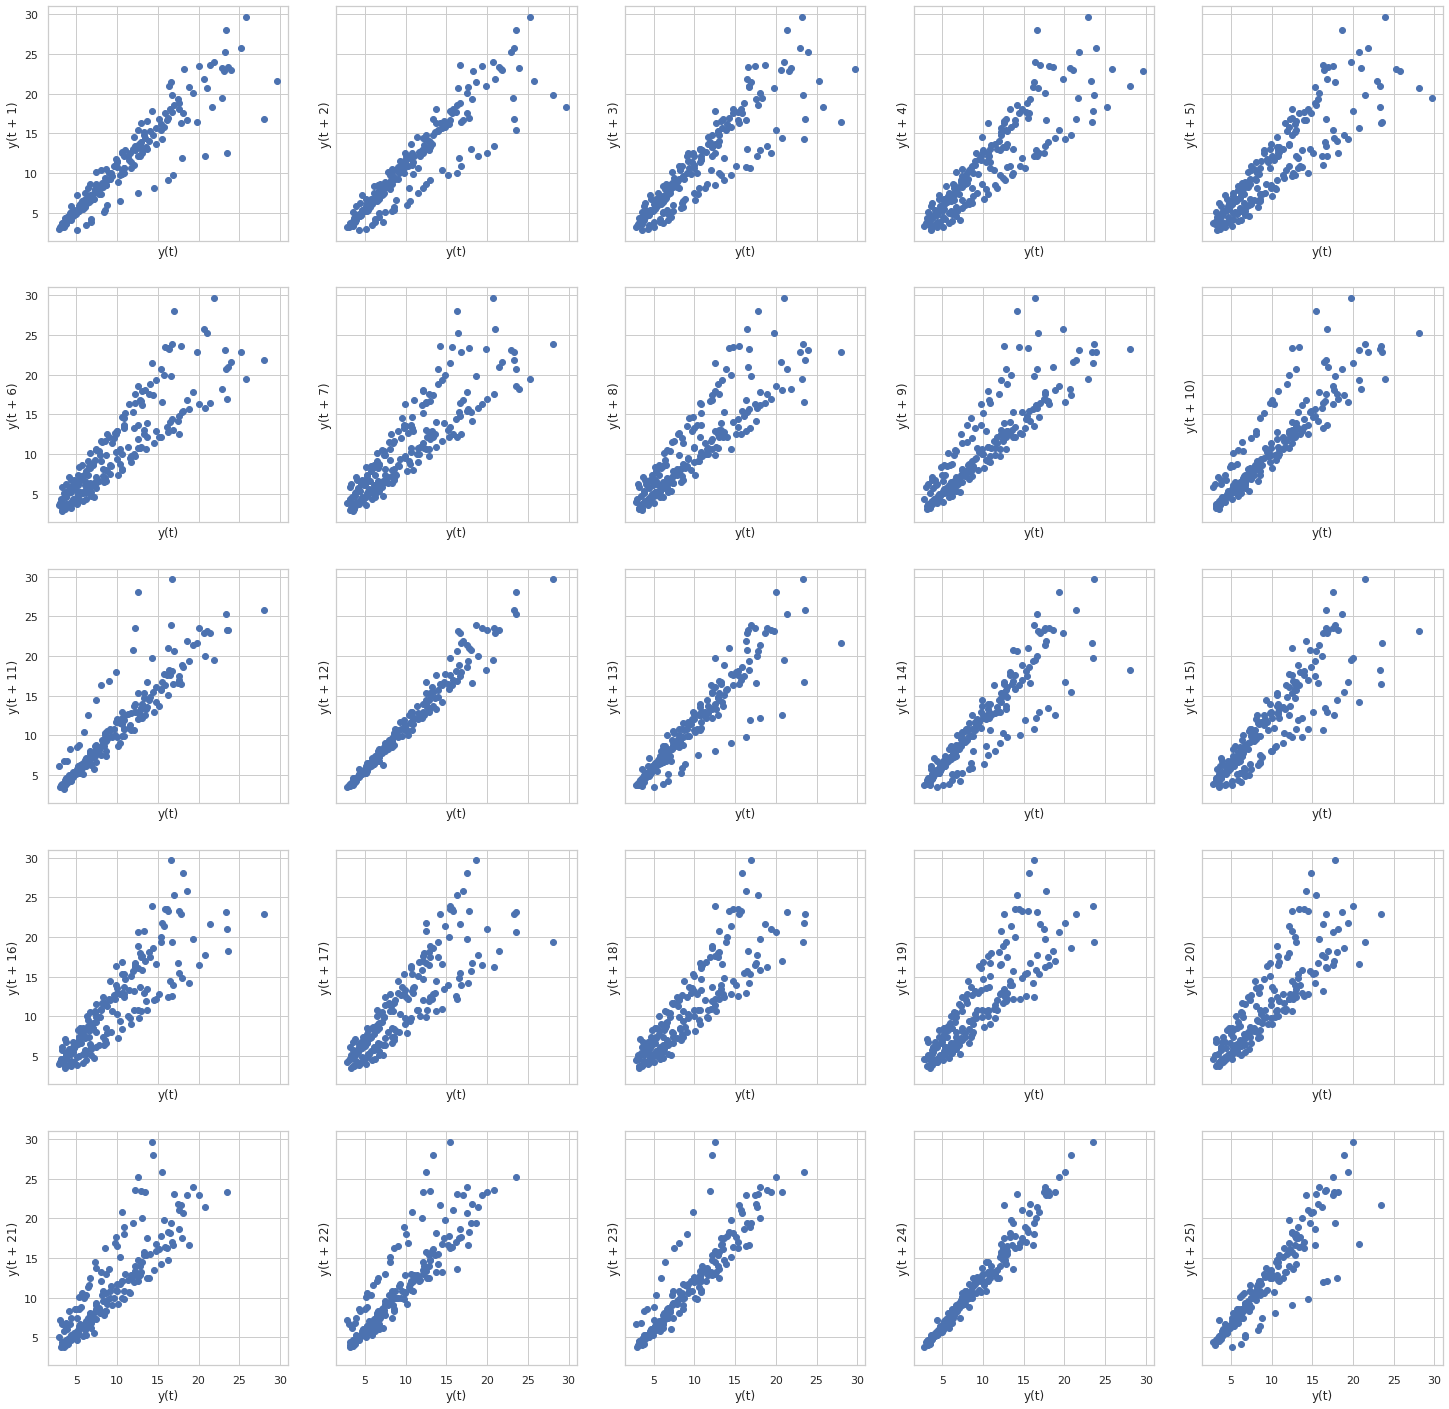

In [9]:
# Lets Use the Lag Plot
from pandas.plotting import lag_plot
plot_lags =25
rows =int(plot_lags/5)
cols =int(plot_lags/5)
fig,axes =plt.subplots(rows,cols,sharex =True,sharey= True)
fig.set_figwidth(plot_lags)
fig.set_figheight(plot_lags)
count= 1
for i in range(rows):
    for j in range(cols):
        lag_plot(ts['y'],lag= count,ax=axes[i,j])
        count+=1


The above plot display a pattern haence it is highly correlated to each other.

# AutoCorrelation Plot:

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

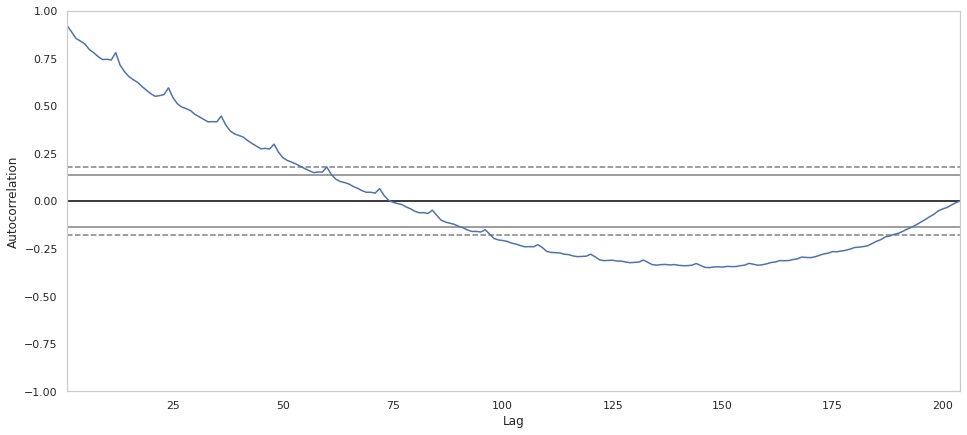

In [10]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(16,7))
autocorrelation_plot(ts['y'])

$Interpretation:$ the trends shows a downward negative fall indication negative autocorrelation

In [11]:
# Decompostion in time Series
decompose =ts[['ds','y']]
decompose.index =ts['ds']
decompose =decompose[['y']]


In [12]:
decompose.head()

,y
ds,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [14]:
decomposition =seasonal_decompose(decompose)

In [15]:
trend=decomposition.trend

In [16]:
trend

ds
1991-07-01   NaN
1991-08-01   NaN
1991-09-01   NaN
1991-10-01   NaN
1991-11-01   NaN
              ..
2008-02-01   NaN
2008-03-01   NaN
2008-04-01   NaN
2008-05-01   NaN
2008-06-01   NaN
Name: trend, Length: 204, dtype: float64

In [17]:
seasonal =decomposition.seasonal
seasonal

ds
1991-07-01   -0.227809
1991-08-01   -0.023116
1991-09-01   -0.149022
1991-10-01    0.569161
1991-11-01    0.966836
                ...   
2008-02-01   -2.272000
2008-03-01   -1.233826
2008-04-01   -1.571464
2008-05-01   -0.593198
2008-06-01   -0.850864
Name: seasonal, Length: 204, dtype: float64

In [18]:
residual =decomposition.resid
residual

ds
1991-07-01   NaN
1991-08-01   NaN
1991-09-01   NaN
1991-10-01   NaN
1991-11-01   NaN
              ..
2008-02-01   NaN
2008-03-01   NaN
2008-04-01   NaN
2008-05-01   NaN
2008-06-01   NaN
Name: resid, Length: 204, dtype: float64

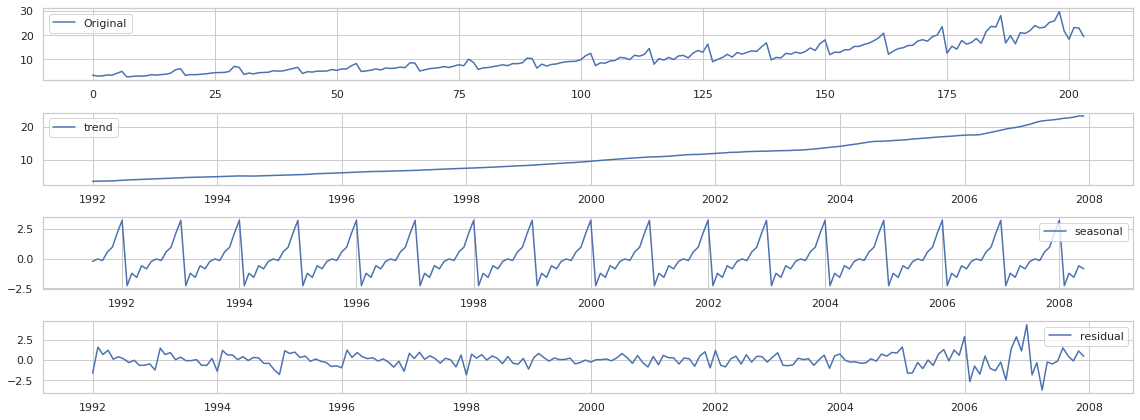

In [19]:
plt.figure(figsize=(16,6))
plt.subplot(411)
plt.plot(ts['y'],label= 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='residual')
plt.legend(loc='best')
plt.tight_layout()

In [20]:
import math 
import datetime
from sklearn.metrics import mean_squared_error

In [21]:
tss =pd.read_csv("stock_price.csv")
tss['ds'] =pd.to_datetime(tss['ds'])
tss.index =tss['ds']
tss =tss[['y']]
print("the shape of the datset",tss.shape)


the shape of the datset (204, 1)


In [22]:
tss.head()

,y
ds,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [23]:
from statsmodels.tsa.stattools import adfuller

In [24]:
def stationary(data):
    dftest =adfuller(data.y,autolag='AIC')
    
    dfoutput =pd.Series(dftest[0:4],index=['Test Stastistic','P value','lag used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value(%s)'%key]= value
    print(dfoutput)
        
    plt.figure(figsize=(16,7))
    plt.plot(data.index,data.y)
    plt.show()

Test Stastistic                  3.145186
P value                          1.000000
lag used                        15.000000
Number of Observations Used    188.000000
Critical Value(1%)              -3.465620
Critical Value(5%)              -2.877040
Critical Value(10%)             -2.575032
dtype: float64


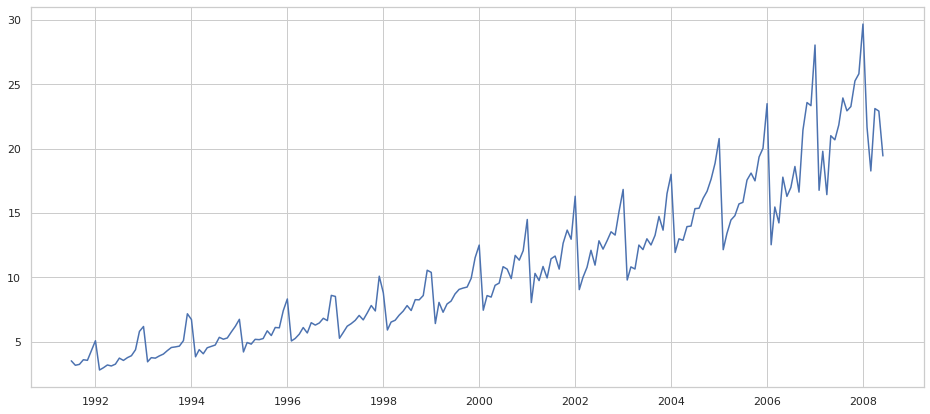

In [25]:
stationary(tss)

### Insights from Stationary Check
- The data is highly nonstationary.
- We need to apply log transformations to make variance constant.

Test Stastistic                 -0.292347
P value                          0.926581
lag used                        14.000000
Number of Observations Used    189.000000
Critical Value(1%)              -3.465431
Critical Value(5%)              -2.876957
Critical Value(10%)             -2.574988
dtype: float64


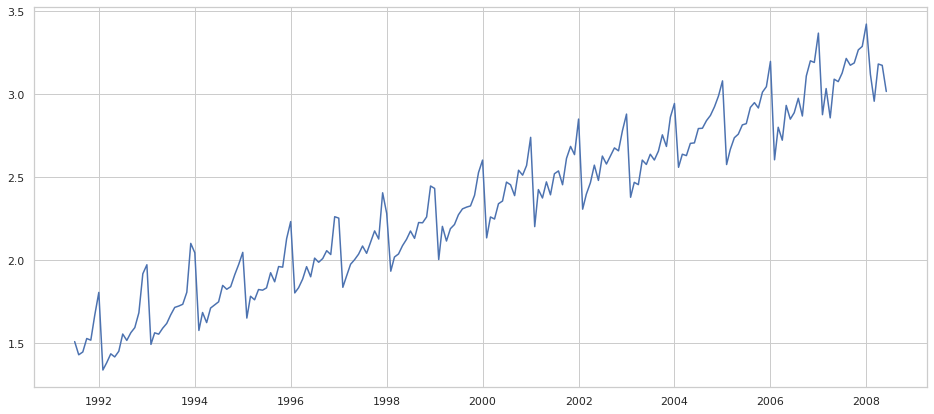

In [26]:
log_train =tss
log_train=log_train['y'].apply(lambda x: math.log(x+1))
log_train =pd.DataFrame(log_train)
stationary(log_train)

### Insights from Stationary Check
- The data is still highly nonstationary, but the variance has become constant.
- Let's remove seasonality and check; subtracting every nth term with n-12th term will let us do this.

Test Stastistic                 -4.822097
P value                          0.000049
lag used                        13.000000
Number of Observations Used    190.000000
Critical Value(1%)              -3.465244
Critical Value(5%)              -2.876875
Critical Value(10%)             -2.574945
dtype: float64


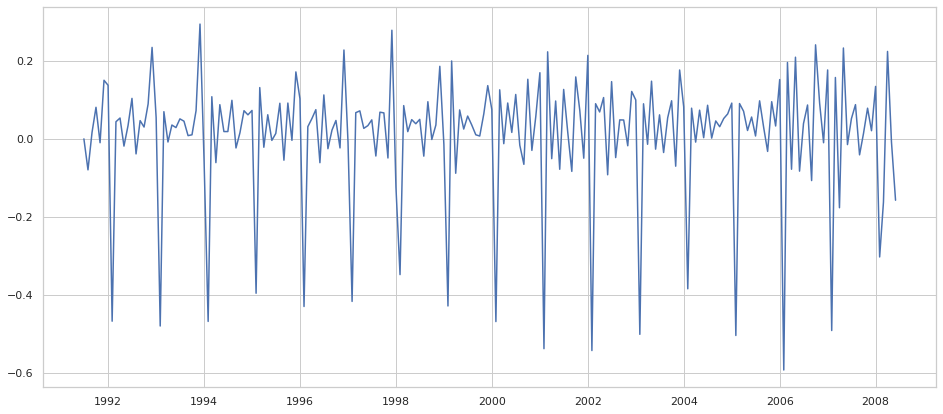

In [27]:
first_diff =log_train['y']-log_train['y'].shift(1)
first_diff =first_diff.fillna(0)
first_diff = pd.DataFrame(first_diff)
stationary(first_diff)

Test Stastistic               -6.254735e+00
P value                        4.366835e-08
lag used                       1.100000e+01
Number of Observations Used    1.920000e+02
Critical Value(1%)            -3.464875e+00
Critical Value(5%)            -2.876714e+00
Critical Value(10%)           -2.574859e+00
dtype: float64


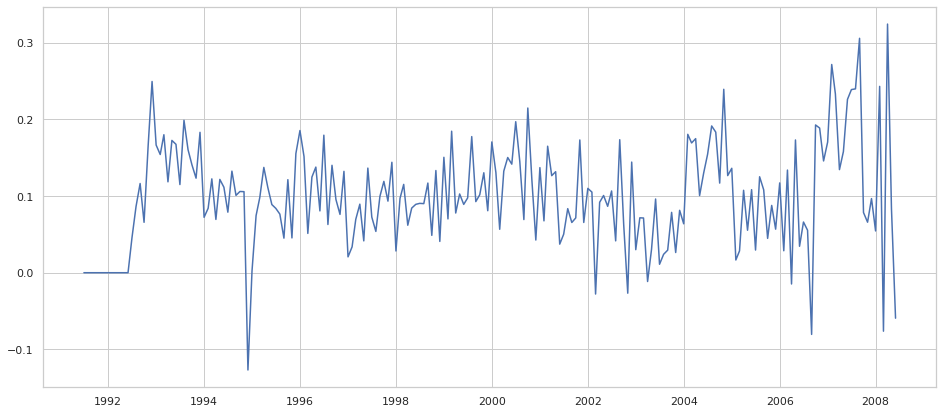

In [28]:
seasonal_data_diff =log_train['y']-log_train['y'].shift(12)
seasonal_data_diff =seasonal_data_diff.fillna(0)
seasonal_data_diff =pd.DataFrame(seasonal_data_diff)
stationary(seasonal_data_diff)

# Auto Correlation (ACF) and Partial Auto Correlation(PACF)

In [29]:
from statsmodels.tsa.stattools import acf,pacf
from math import sqrt

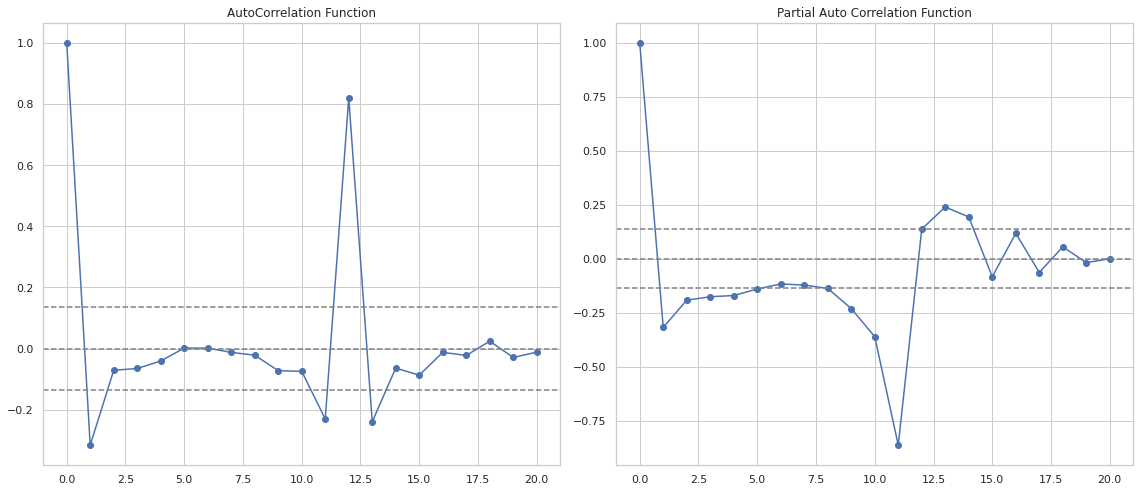

In [30]:
lag_acf =acf(first_diff,nlags=20)
lag_pcf= pacf(first_diff,nlags=20,method ='ols')
plt.figure(figsize=(16,7))

# Plot ACF:
plt.subplot(121)
plt.plot(lag_acf,marker='o')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/sqrt(len(first_diff)),linestyle='--',color='gray')
plt.title('AutoCorrelation Function')

# Plotting Partial Auto Correlation hee z score value is 1.96 as we need 95% accuracy in the model
plt.subplot(122)
plt.plot(lag_pcf, marker='o')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/sqrt(len(first_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/sqrt(len(first_diff)),linestyle='--',color='gray')
plt.title("Partial Auto Correlation Function")
plt.tight_layout()


# ARIMA Model

In [31]:
from statsmodels.tsa.arima.model import ARIMA
model =ARIMA(log_train,order=(1,1,0),freq='MS')
result_ARIMA =model.fit()

/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [32]:
x_train = tss[tss.index <datetime.datetime(2005, 1, 1, 0, 0, 0)]
x_test = tss[tss.index >=datetime.datetime(2005, 1, 1, 0, 0, 0)]
print(x_train.shape, x_test.shape)

(162, 1) (42, 1)


4.139050937444191


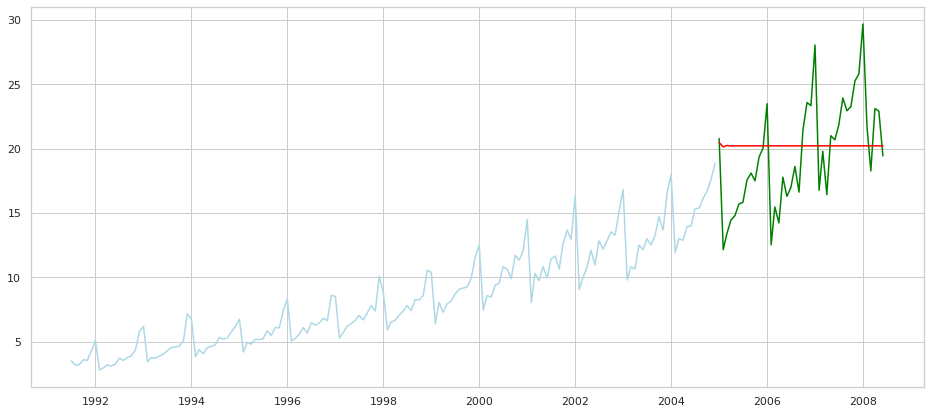

In [33]:
plt.figure(figsize=(16,7))
plt.plot(x_train.index,x_train.values,color='lightblue')
plt.plot(x_test.index,x_test.values,color='green')

# code for chescking forecasting
pred= pd.DataFrame(result_ARIMA.forecast(len(x_test)))
pred.columns =['yhat']
pred.index=x_test.index

pred['yhat']=pred['yhat'].apply(lambda x:math.exp(x)-1)

measure =math.pow(mean_squared_error(x_test.values, pred.values),0.5)
print(measure)
plt.plot(pred.index,pred.fillna(0).values,color='red')
plt.show()

In [34]:
from statsmodels.tsa.arima.model import ARIMA
model =ARIMA(log_train,order=(2,2,2),freq='MS')
result_ARIMA =model.fit()

/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [35]:
print(result_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  204
Model:                 ARIMA(2, 2, 2)   Log Likelihood                  92.148
Date:                Sat, 16 Sep 2023   AIC                           -174.297
Time:                        15:07:09   BIC                           -157.755
Sample:                    07-01-1991   HQIC                          -167.604
                         - 06-01-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2382      0.122    -10.116      0.000      -1.478      -0.998
ar.L2         -0.2387      0.119     -2.000      0.045      -0.473      -0.005
ma.L1         -0.0086   6855.513  -1.26e-06      1.0

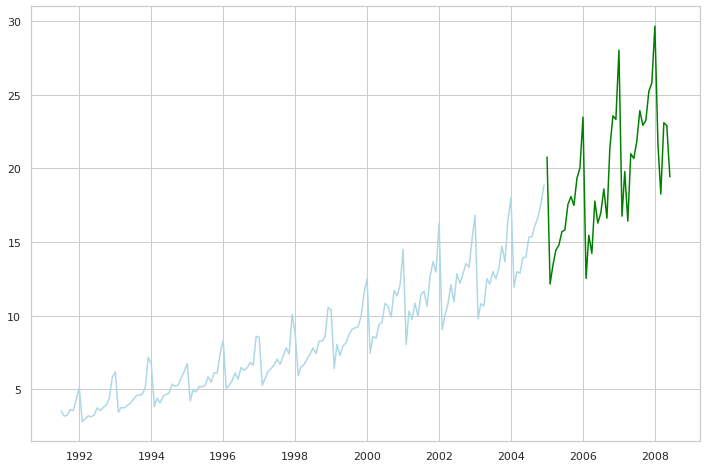

In [36]:
plt.figure(figsize=(12,8))
plt.plot(x_train.index,x_train.values,color='lightblue')
plt.plot(x_test.index,x_test.values,color='green')


In [37]:
pred =pd.DataFrame(result_ARIMA.forecast(len(x_test)))
pred.columns=['yhat']
pred.index=x_test.index
pred

,yhat
ds,
2005-01-01,3.102845
2005-02-01,3.053547
2005-03-01,3.113450
2005-04-01,3.070379
2005-05-01,3.128742
2005-06-01,3.086091
2005-07-01,3.144301
2005-08-01,3.101739
2005-09-01,3.159876


In [38]:
pred['yhat']=pred['yhat'].apply(lambda x: math.exp(x)-1)


In [39]:
pred.head()

,yhat
ds,
2005-01-01,21.261204
2005-02-01,20.190371
2005-03-01,21.498522
2005-04-01,20.550066
2005-05-01,21.845213


In [40]:
measure =math.sqrt(mean_squared_error(x_test.values,pred.values))
print(measure)


5.780586646618949


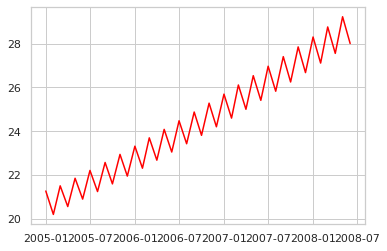

In [41]:
plt.plot(pred.index,pred.fillna(0).values,color='red')
plt.show()

-Zeba Khan